<img src="https://www.itzem.com/wp-content/uploads/2019/06/Used-Cars.jpg" style="float: left; margin: 20px;height: 350px; width:950px">


# Quality Motors

-------

### Data Analysis and Prediction with Craigslist Used Cars Data



Quality Motors is a medium size of a used card dealer store. To maintain our reputation  and expand our clients base (not only from local), we have to have a good used cars selection at a good price point to be stand out in the market. Therefore, a good market price prediction will provide a good guidance for sales team.  That being said, we also can identify some potential good deals from third party such as private party.


How to increase sales revenue by 10% by utilizing market price prediction model to identify good price point in order to generate more online sales in coming six months?
Data Analysis goals:
- Use statistical analysis to identify the used cars selling trend.
- Use visualization to identify the important variables of prediction used car market price
- Create model to prediction the market price



This project uses the [Used Cars Dataset Vehicles listings from Craigslist.org](https://www.kaggle.com/austinreese/craigslist-carstrucks-data).

-------


# Dataset

### 1. Introducing the Original Dataset Fields ## 

I've generated a simple table on what each feature can be described and its type from dataset before cleasing

| Variable Name |  Type   |Description|
| :----------:  | :-----: |:------------:|
|Price|Integer| The Vehicle's listed price in dollars|
|Id|Integer| The Vehicle's unique identification number|
|URL|String| The url of the listing on Craiglist|
|Region|String| Region where the Vehicle locate|
|Region_URL|String| Craiglist's Region URL|
|Year|Float| Vehicle manufacturing year|
|Manufacturer|String| Vehicle manufacturer|
|Model|String| Vehicle model|
|Condition|String| Vehicle condition per seller|
|Cylinders|String| Number of cylinders of the vehicle|
|Fuel|String| Vehicle fuel type|
|Odometer|Float| Mileage of the vehicle when posting the listing|
|Title_Status|String| Status of the vehicle|
|Image_URL|String| URL of the vehicle images|
|Description|String| Details description about the vehicle per seller|
|County|Float| County where the Vehicle locate|
|State|String| State where the vehicle locate|
|Latitude|Float| Latitude where vehicle locate|
|Longitude|Float| Longitude where vehicle locate|

---
There are a total of 539759 observations and 25 variables including the target variable, `Price`.

Let's start first by subsetting the data into the residential houses. 

**Project goal:**
1. Perform cleaning, feature engineering, and EDA necessary.
- Remove any used cars that are older than 30 years old, lacking of pricing information or unrealistic listings from the dataset.
- Visualizing the relationship between Price and all Varibles
- Identify **features** that can predict price.
- Perform prediction model by using OLS and checking the RSqaure.

### 2. Data Loading and Cleansing

In [1]:
# I will need to import all necessary libraries to do the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter
import statsmodels.api as sm
from scipy import stats


%matplotlib inline

In [2]:
# identify the path of files
cars =pd.read_csv('C:/Users/hokam/OneDrive/Desktop/Capstone Project2/vehicles.csv')

In [3]:
# get a general idea of the dataset's basic information
cars.shape

(539759, 25)

In [4]:
cars.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7088746062,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,10299,2012.0,acura,tl,NaN,NaN,...,NaN,NaN,other,blue,https://images.craigslist.org/01414_3LIXs9EO33...,2012 Acura TL Base 4dr Sedan Offered by: B...,NaN,nc,35.7636,-78.7443
1,7088745301,https://greensboro.craigslist.org/ctd/d/bmw-3-...,greensboro,https://greensboro.craigslist.org,0,2011.0,bmw,335,NaN,6 cylinders,...,rwd,NaN,convertible,blue,https://images.craigslist.org/00S0S_1kTatLGLxB...,BMW 3 Series 335i Convertible Navigation Dakot...,NaN,nc,NaN,NaN
2,7088744126,https://greensboro.craigslist.org/cto/d/greens...,greensboro,https://greensboro.craigslist.org,9500,2011.0,jaguar,xf,excellent,NaN,...,NaN,NaN,NaN,blue,https://images.craigslist.org/00505_f22HGItCRp...,2011 jaguar XF premium - estate sale. Retired ...,NaN,nc,36.1032,-79.8794
3,7088743681,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,3995,2004.0,honda,element,NaN,NaN,...,fwd,NaN,SUV,orange,https://images.craigslist.org/00E0E_eAUnhFF86M...,2004 Honda Element LX 4dr SUV Offered by: ...,NaN,nc,35.7636,-78.7443
4,7074612539,https://lincoln.craigslist.org/ctd/d/gretna-20...,lincoln,https://lincoln.craigslist.org,41988,2016.0,chevrolet,silverado k2500hd,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00S0S_8msT7RQquO...,"Shop Indoors, Heated Showroom!!!www.gretnaauto...",NaN,ne,41.1345,-96.2458


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539759 entries, 0 to 539758
Data columns (total 25 columns):
id              539759 non-null int64
url             539759 non-null object
region          539759 non-null object
region_url      539759 non-null object
price           539759 non-null int64
year            538772 non-null float64
manufacturer    516175 non-null object
model           531746 non-null object
condition       303707 non-null object
cylinders       321264 non-null object
fuel            536366 non-null object
odometer        440783 non-null float64
title_status    536819 non-null object
transmission    535786 non-null object
vin             315349 non-null object
drive           383987 non-null object
size            168550 non-null object
type            392290 non-null object
paint_color     365520 non-null object
image_url       539740 non-null object
description     539738 non-null object
county          0 non-null float64
state           539759 non-null obj

In [6]:
# I don't need all url links for my analysis, we have unique ID for each row, so vin number is not necessary
# we have column state, so we don't need county, latitude, region and longitude
# repeated information are in description, so I don't need it as well.
cars.drop(columns=['url','image_url','region_url','vin',
                   'county','description','region','model','lat','long'],inplace=True)

In [7]:
# checking missing values 
cars.isnull().sum()

id                   0
price                0
year               987
manufacturer     23584
condition       236052
cylinders       218495
fuel              3393
odometer         98976
title_status      2940
transmission      3973
drive           155772
size            371209
type            147469
paint_color     174239
state                0
dtype: int64

In [8]:
# rename the columns
new_columns_dic ={'id': 'ID','price': 'Price',
                  'year': 'Year','manufacturer': 'Manufacturer',
                  'condition':'Condition','cylinders':'Cyl','fuel': 'Fuel',
                  'odometer': 'Odometer','title_status':'Title_status',
                 'transmission':'Transmission','drive':'Drive',
                 'size':'Size','type':'Type',
                 'paint_color':'Paint_color','state':'State'}
cars.rename(columns=new_columns_dic,inplace=True)

### 3. Removing 0 values rows

In [9]:
# checking if there are some column is non null but the value =0
for i in cars.columns:
    if cars[i][cars[i]==0].count()>0:
        print('There are %d zero values in %s' %(cars[i][cars[i]==0].count(),i))

There are 44689 zero values in Price
There are 1 zero values in Year
There are 2376 zero values in Odometer


In [10]:
# For those non null value but there are 0 value, i will assume it as input error, thus, i will drop those
cars = cars.loc[~((cars['Year']==0)| (cars['Price'] ==0)|(cars['Odometer'] ==0))]

In [11]:
# rechecking if there is any 0 value in dataset
for i in cars.columns:
    if cars[i][cars[i]==0].count()>0:
        print('There are %d zero values in %s' %(cars[i][cars[i]==0].count(),i))

### 4. Separate Features into Categorical and Numerical Features and Filling the missing Values

#### Categorical and Numerical Features
Let's define a function to separate the featuers into Categorical and Numerical feature first.

In [12]:
# define a function to separate the feature in order to filling missing value by using looping function.

categorical_feature = []
numerical_feature = []

def check_dtypes(df):
    #Looping 
    for col in df.columns.tolist():
        if df[col].dtype=='object':
            categorical_feature.append(col)
        else:
            numerical_feature.append(col)
    
    #make dataframe that have two feature, that is categorical and numerical feature
    categorical = pd.Series(categorical_feature, name='Categorical Feature')
    numerical = pd.Series(numerical_feature, name='Numerical Feature')
    df_dtypes = pd.concat([categorical,numerical], axis=1)
    
    return df_dtypes

In [13]:
check_dtypes(cars)

,Categorical Feature,Numerical Feature
0,Manufacturer,ID
1,Condition,Price
2,Cyl,Year
3,Fuel,Odometer
4,Title_status,NaN
5,Transmission,NaN
6,Drive,NaN
7,Size,NaN
8,Type,NaN
9,Paint_color,NaN


Now, we can fill the missing values per their feature characteristics. I decide to use `median` to fill the missing values  under numerical features because our target variable has a lot of outlier, by filling mean in the missing values, it will affect our dataset. In addtion, I will use `mode` to fill missing value under categorical features. 

#Thanks to https://towardsdatascience.com/the-tale-of-missing-values-in-python-c96beb0e8a9d

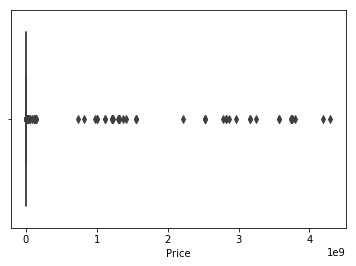

In [14]:
sns.boxplot(cars['Price'])

In [15]:
# filling missing value 
def fill_missing(df, varlist = None , vartype = None ):
    # filling numerical data with median
    if vartype == 'numerical' :
        for col in varlist:
            df[col] = df[col].fillna(df[col].median())
    
    # filling categorical data with mode  
    if vartype == 'categorical' :
        for col in varlist:
            df[col] = df[col].fillna(df[col].mode().iloc[0])

In [16]:
# filling miss value on the numerical columns with their median
fill_missing(cars, numerical_feature, 'numerical')

In [17]:
# filling miss value on the categorical column with their mode
fill_missing(cars, categorical_feature,'categorical')

In [18]:
cars.isnull().sum()

ID              0
Price           0
Year            0
Manufacturer    0
Condition       0
Cyl             0
Fuel            0
Odometer        0
Title_status    0
Transmission    0
Drive           0
Size            0
Type            0
Paint_color     0
State           0
dtype: int64

In [19]:
# Year and Odometer should not be float, I will change their type to integer
cars['Year'] = cars['Year'].apply(lambda x: int(x))
cars['Odometer'] = cars['Odometer'].apply(lambda x : int(x))

In [20]:
# rechecking 0 values to ensuer nothinng went wrong during filling up the values
for i in cars.columns:
    if cars[i][cars[i]==0].count()>0:
        print('There are %d zero values in %s' %(cars[i][cars[i]==0].count(),i))

Let's reindex our rows to identify the change easily in the future.

In [21]:
# reindex rows
cars.reset_index(drop=True, inplace=True)

### 6. Reshape Data to fit our analysis goal

In [22]:
cars.describe()

,ID,Price,Year,Odometer
count,4.936840e+05,4.936840e+05,493684.000000,4.936840e+05
mean,7.087631e+09,2.136132e+05,2009.571848,1.016658e+05
std,5.218418e+06,2.308993e+07,8.793724,1.655230e+05
min,7.065765e+09,1.000000e+00,1900.000000,1.000000e+00
25%,7.084287e+09,5.499000e+03,2006.000000,6.045275e+04
50%,7.088998e+09,1.080000e+04,2011.000000,9.551400e+04
75%,7.092091e+09,1.890000e+04,2015.000000,1.292232e+05
max,7.093537e+09,4.294967e+09,2021.000000,6.480922e+07


Reshape dataset: `Numerical Features`

1. Price - we can see that price min is 1 which isn't realistic, so I will set the min price of listing to be at least   $1000
-  Year - As I can see that there are some listings' vehicle year are in 2021 and with more than 100K milege since it is unlikely to be true, I will drop those columns

- Age - I will add a column ' Age ' as subsitude of Year since we can't actually use Year as variable to analyze the correlation. Because this dataset is a ongoing dataset which data are scraping from craiglist, so I will calculate the cars'age by using the current year (2020) - cars' year.Lastly, vintage cars aren't our market, so we decide to look at the cars between 0~30 years old.

- Odometer - it is unlikely that mileage will over 1,000,000. We are more interesting in the mileage that is under 500,000 which will still maintain their resell value depend on the brand and other factors.


In [23]:
print(cars['Odometer'].std())
print(cars['Odometer'].min())
print(cars['Odometer'].max())

165523.01154386075
1
64809218


In [24]:
#set the min price of listing to be at least $1000
cars = cars[cars['Price']. between(999.99,39000)]

# Removing cars is made 2021 and with 100K mileage on it. Total 26 columns
cars = cars[cars['Year'] <=2020] 

# Removing cars have mileage equal or greater than 500000
cars = cars[cars['Year'] <=500000]

# Adding 'Age' column 
cars["Age"] = cars.Year.apply(lambda x: int(2020-x))
cars = cars[(cars.Age >= 0) & (cars.Age <= 30)]


Reshape dataset: `Categorical Features`

1. Title status - If we are going to buy back used cars from Cariglist or we sell used cars to customers, unlikely we will sell or buy back any cars that have salvage title because of high repair cost and least chance to resell them, so I decide to drop them. Aslo, We are not interested in auto parts, so I will drop these rows which have titles as 'parts only'.
- We see there are some salvage under Condition, but we will keep those since those need experts to evaluate vehicles's actual condtion

In [25]:
for i in categorical_feature:
    print(cars[i].unique())

['acura' 'jaguar' 'honda' 'kia' 'chevrolet' 'bmw' 'toyota' 'nissan'
 'volkswagen' 'ford' 'gmc' 'subaru' 'ram' 'lexus' 'volvo' 'dodge' 'buick'
 'jeep' 'hyundai' 'mercedes-benz' 'cadillac' 'audi' 'infiniti' 'pontiac'
 'mini' 'chrysler' 'mazda' 'mercury' 'fiat' 'harley-davidson' 'lincoln'
 'saturn' 'mitsubishi' 'rover' 'tesla' 'alfa-romeo' 'aston-martin'
 'land rover' 'porche']
['excellent' 'good' 'fair' 'like new' 'salvage' 'new']
['6 cylinders' '8 cylinders' '4 cylinders' '5 cylinders' '3 cylinders'
 '10 cylinders' 'other' '12 cylinders']
['gas' 'diesel' 'hybrid' 'other' 'electric']
['clean' 'salvage' 'rebuilt' 'lien' 'parts only' 'missing']
['automatic' 'manual' 'other']
['4wd' 'fwd' 'rwd']
['full-size' 'compact' 'mid-size' 'sub-compact']
['other' 'sedan' 'SUV' 'wagon' 'convertible' 'pickup' 'hatchback' 'truck'
 'coupe' 'offroad' 'van' 'mini-van' 'bus']
['blue' 'orange' 'white' 'black' 'silver' 'red' 'grey' 'green' 'custom'
 'brown' 'yellow' 'purple']
['nc' 'co' 'ny' 'nj' 'va' 'tn' 'il

In [26]:
indexNames = cars[cars['Title_status'] == 'parts only'].index
cars.drop(indexNames, inplace=True)

indexNames1 = cars[cars['Title_status'] == 'salvage'].index
cars.drop(indexNames1, inplace=True)

In [27]:
cars.shape

(446447, 16)

93,312 data have been removed from the dataset. We now have 446,447 Obeservations and 16 Columns.

### 7. Reclassify columns: State, Manufacturer and Color

We are planning to generate a dummy variables for the presence of the feature,thus, I will classify state, manfuactuere and color into different categories since they have the most of unique value in its field, so it will be easier to for analysis their relationship with Price in the future by classifing them.

In [28]:
# add a column to classify states in to different part of USA
# thanks to https://www.path2usa.com/us-map-with-states-and-their-abbreviations
# thanks to https://stackoverflow.com/questions/52529293/how-to-reclassify-pandas-dataframe-column
def clean_state(row):
    Northeast = ['me','vt','nh','ma','ri','ct','nj','de','md','pa','ny']
    West = ['wa','or','id','ut','nv','ca','ak','hi']       
    South = ['wv','va','nc','sc','ga','fl','al','ms','la','ar','tn','ky']
    Midwest = ['mn','wi','mi','oh','in','il','mo','ia']
    Southwest = ['az','nm','tx','ok','dc']
    Central = ['mt','wy','co','nd','sd','ne','ks']
    
    if row.State in Northeast:
        return 'Northeast'   
    if row.State in West:
        return 'West'
    if row.State in South:
        return 'South'   
    if row.State in Midwest:
        return 'Midwest'  
    if row.State in Southwest:
        return 'Southwest'   
    if row.State in Central:
        return 'Central'  
    return row.State

cars['State_Classify'] = cars.apply(clean_state,axis=1)

In [29]:
# add a column to classify Manufacturer into Luxury and Regular cars
def clean_manufacturer(row):
    
    Luxury_cars = ['acura','jaguar','bmw','lexus','volvo','mercedes-benz','cadillac','audi', 'infiniti','tesla',
                   'alfa-romeo', 'aston-martin','land rover', 'rover','porche','ferrari']
    Regular_cars = ['honda', 'kia', 'chevrolet', 'toyota','nissan','ford', 'volkswagen',
                    'gmc', 'subaru', 'ram', 'dodge', 'buick', 'jeep', 'hyundai', 'pontiac', 'mini', 'chrysler',
                    'mazda', 'lincoln', 'mercury', 'fiat', 'harley-davidson', 'saturn','mitsubishi', 'datsun']       
    
    if row.Manufacturer in Luxury_cars:
        return 'Luxury_cars'   
    if row.Manufacturer in Regular_cars:
        return 'Regular_cars'

    return row.Manufacturer

cars['Brand_Classify'] = cars.apply(clean_manufacturer,axis=1)

In [30]:
cars.Paint_color.unique()

array(['blue', 'orange', 'white', 'black', 'silver', 'red', 'grey',
       'green', 'custom', 'brown', 'yellow', 'purple'], dtype=object)

In [31]:
# add a column to classify Paint color into Standard, Special and Custom Color
def clean_color(row):
    Standard_color = ['white', 'black', 'silver', 'red', 'grey']
       
    Special_color =  ['blue', 'orange','green','brown', 'yellow', 'purple'] 
    Custom_color = ['custom']
    
    if row.Paint_color in Standard_color:
        return 'Standard_color'   
    if row.Paint_color in Special_color:
        return 'Special_color'
    if row.Paint_color in Custom_color:
        return 'Custom_color'  

cars['Color_Classify'] = cars.apply(clean_color,axis=1)

# Removing Outliers by IQR 

We can see the Odometer definitely has the negative relationship with Price which makes sense that higher resell price with lower mileage. Also, we do notice some of outliers in the scatterplot, let's remove them by using IQR method.

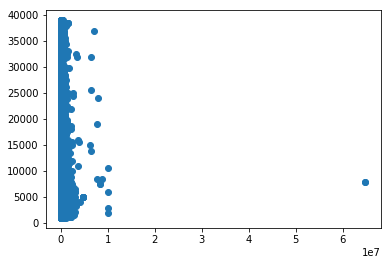

In [32]:
plt.scatter(cars['Odometer'], cars['Price']);

In [33]:
Q1 = cars[['Price','Odometer']].quantile(0.25); print(Q1)
Q3 = cars[['Price','Odometer']].quantile(0.75); print(Q3)
IQR = Q3-Q1;print(IQR)

Price        5900.0
Odometer    63866.0
Name: 0.25, dtype: float64
Price        17999.0
Odometer    132600.0
Name: 0.75, dtype: float64
Price       12099.0
Odometer    68734.0
dtype: float64


In [34]:
#remove  outlier which are 1.5 *IQR
lower_bound = Q1 -(1.5 * IQR)
upper_bound = Q3 +(1.5 * IQR)
cars_true = cars[~((cars < lower_bound) |(cars > upper_bound)).any(axis=1)]

In [35]:
cars_true.shape

(432035, 19)

In [36]:
cars_true.reset_index(drop=True, inplace=True)

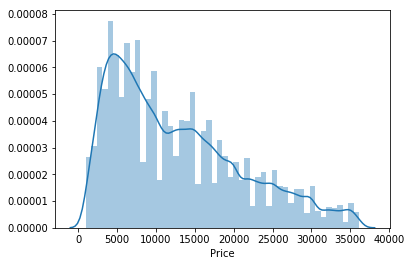

In [37]:
sns.distplot(cars_true['Price'])

# Data Visualization 

### A. Numerical Featuers 
#### - Odometer   

Text(0.5, 0.98, 'Odometer vs Price : Luxury Cars (Left) and Regular Cars (Right)')

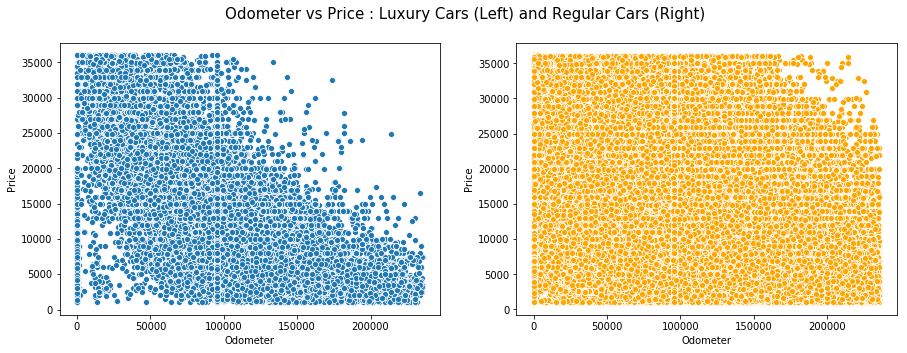

In [38]:
df_luxury = cars_true[cars_true['Brand_Classify'] == 'Luxury_cars']
df_regular_cars = cars_true[cars_true['Brand_Classify'] == 'Regular_cars']
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x='Odometer', y="Price",data=df_luxury)

plt.subplot(1,2,2)
sns.scatterplot(x='Odometer', y="Price",data=df_regular_cars, color='Orange')

plt.suptitle("Odometer vs Price : Luxury Cars (Left) and Regular Cars (Right)", fontsize = 15)

### **`Insight`**
1. The first plot indicates that most recent used cars with low mileage are having high price range, we also can see some older cars with high mileage are spread at the low bottom right at the chart which are at the low price point. 
2. We want to see if there is clearer relationship between Price and Odometer by used cars' class (luxury vs regular). From Luxury cars plot, we clearly see the negative trend that confirm that Price and Odometer do have strong relationship. 

#### - Age vs Price

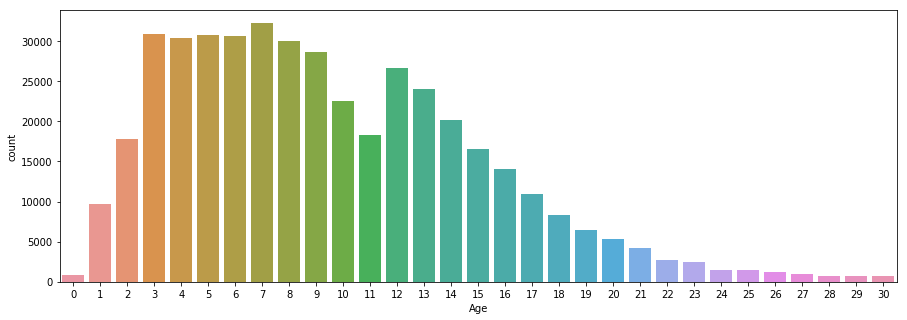

In [39]:
plt.figure(figsize=(15,5))
sns.countplot(cars_true.Age);

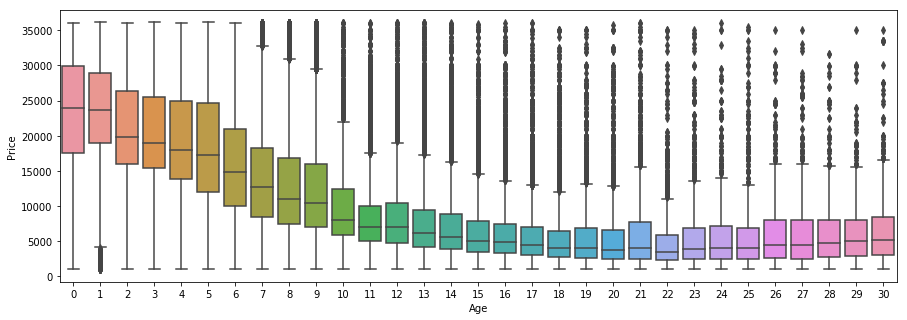

In [40]:
plt.figure(figsize=(15,5))
sns.boxplot(cars_true['Age'],cars_true['Price']);

### **`Insight`**
1. The first plot states that we can find most of used cars which are 3-9 years old in the markets. 
2. We also discovered that vehicles are under 10 years old have way higher median resell price than those older than 10 years old. But we also can see there are some outliers present in those older used cars. I will assume that those cars might have other factors to boost up their resell price such as brand, low mileage and their condition.

### B. Categorical Featuers vs Price 

#### - Cars Mechanic Characteristics ( Cylender, Fuel, Transmission, Drive, Size and Type)

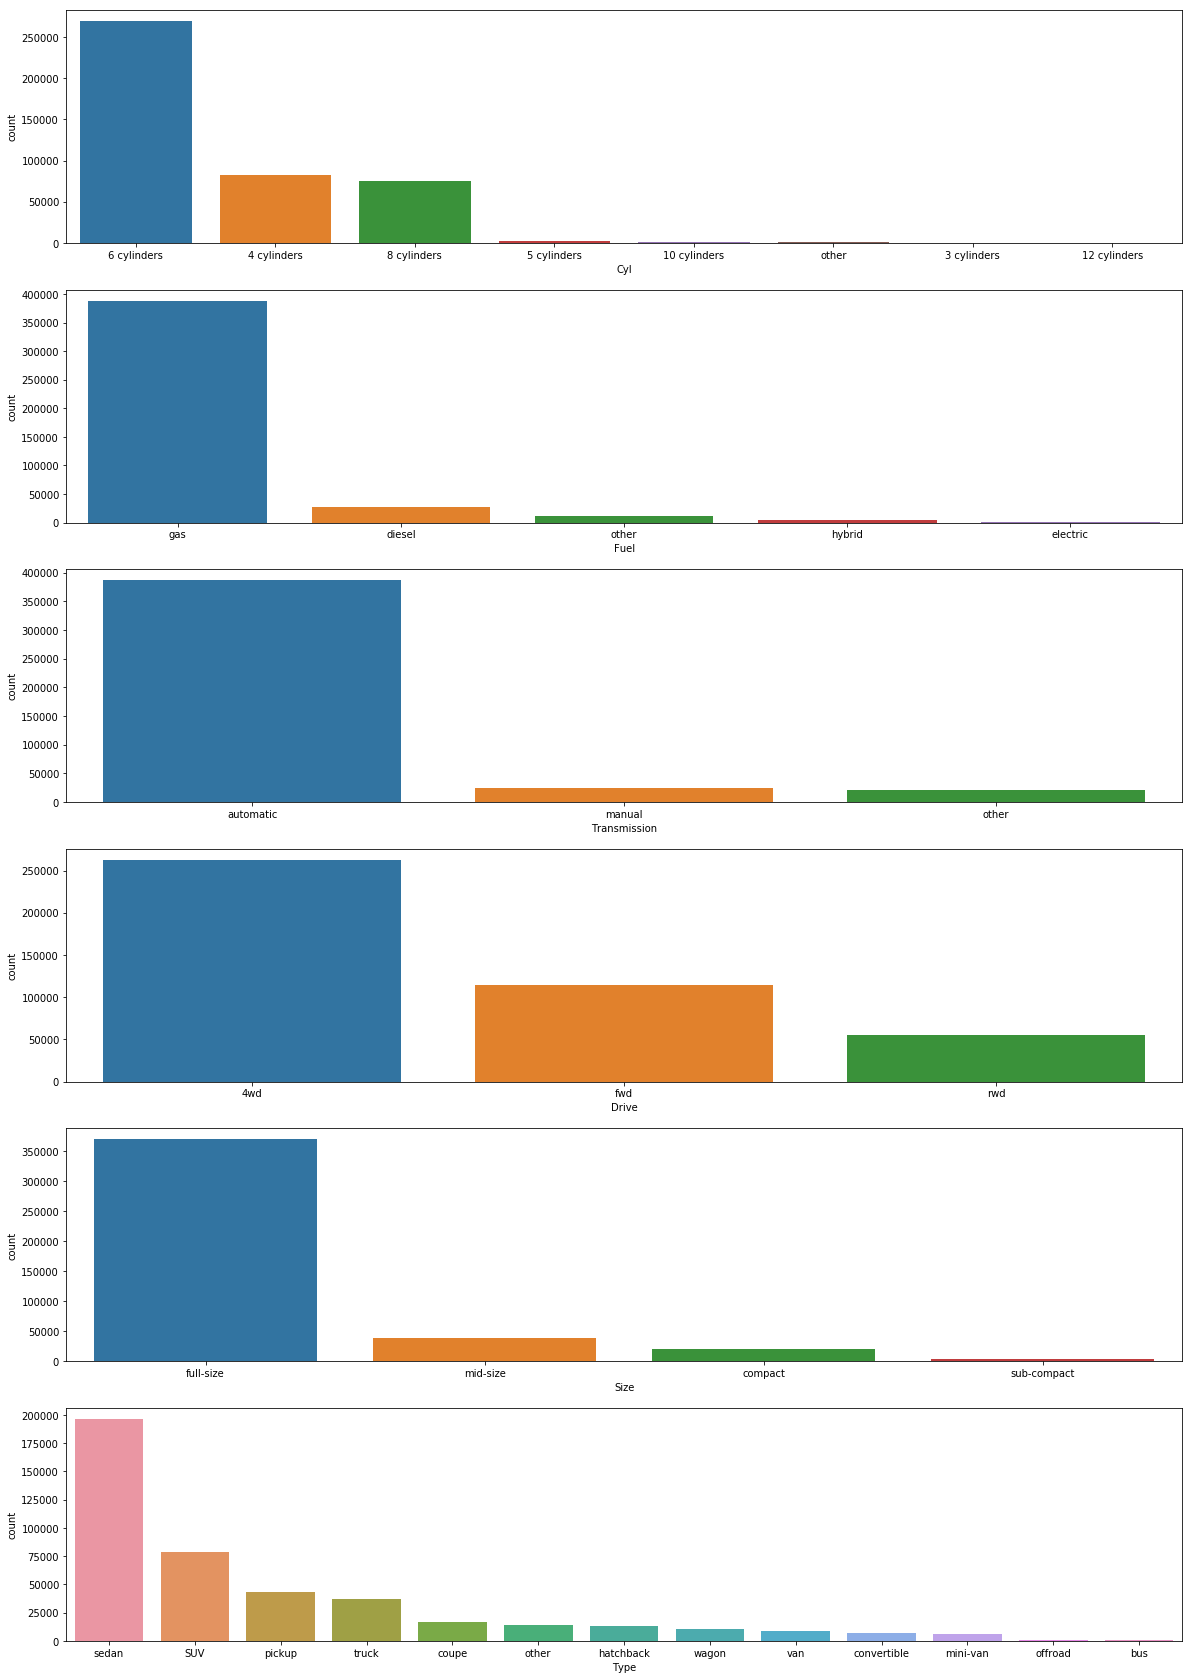

In [41]:
car_mechanic_features =['Cyl','Fuel','Transmission','Drive','Size','Type']

f=plt.figure(figsize=(20,30))
j=1
for i in cars_true[car_mechanic_features]:
    f.add_subplot(6,1,j)
    sns.countplot(cars_true[i],order=cars_true[i].value_counts().index)
    j+=1
plt.show()

### **`Insight`**

The features have the most listing numbers: 6 Cylenders, Gas Fuel, Automatic Transmission, 4 Wheel Drive, Full Size cars and Sedan Type.



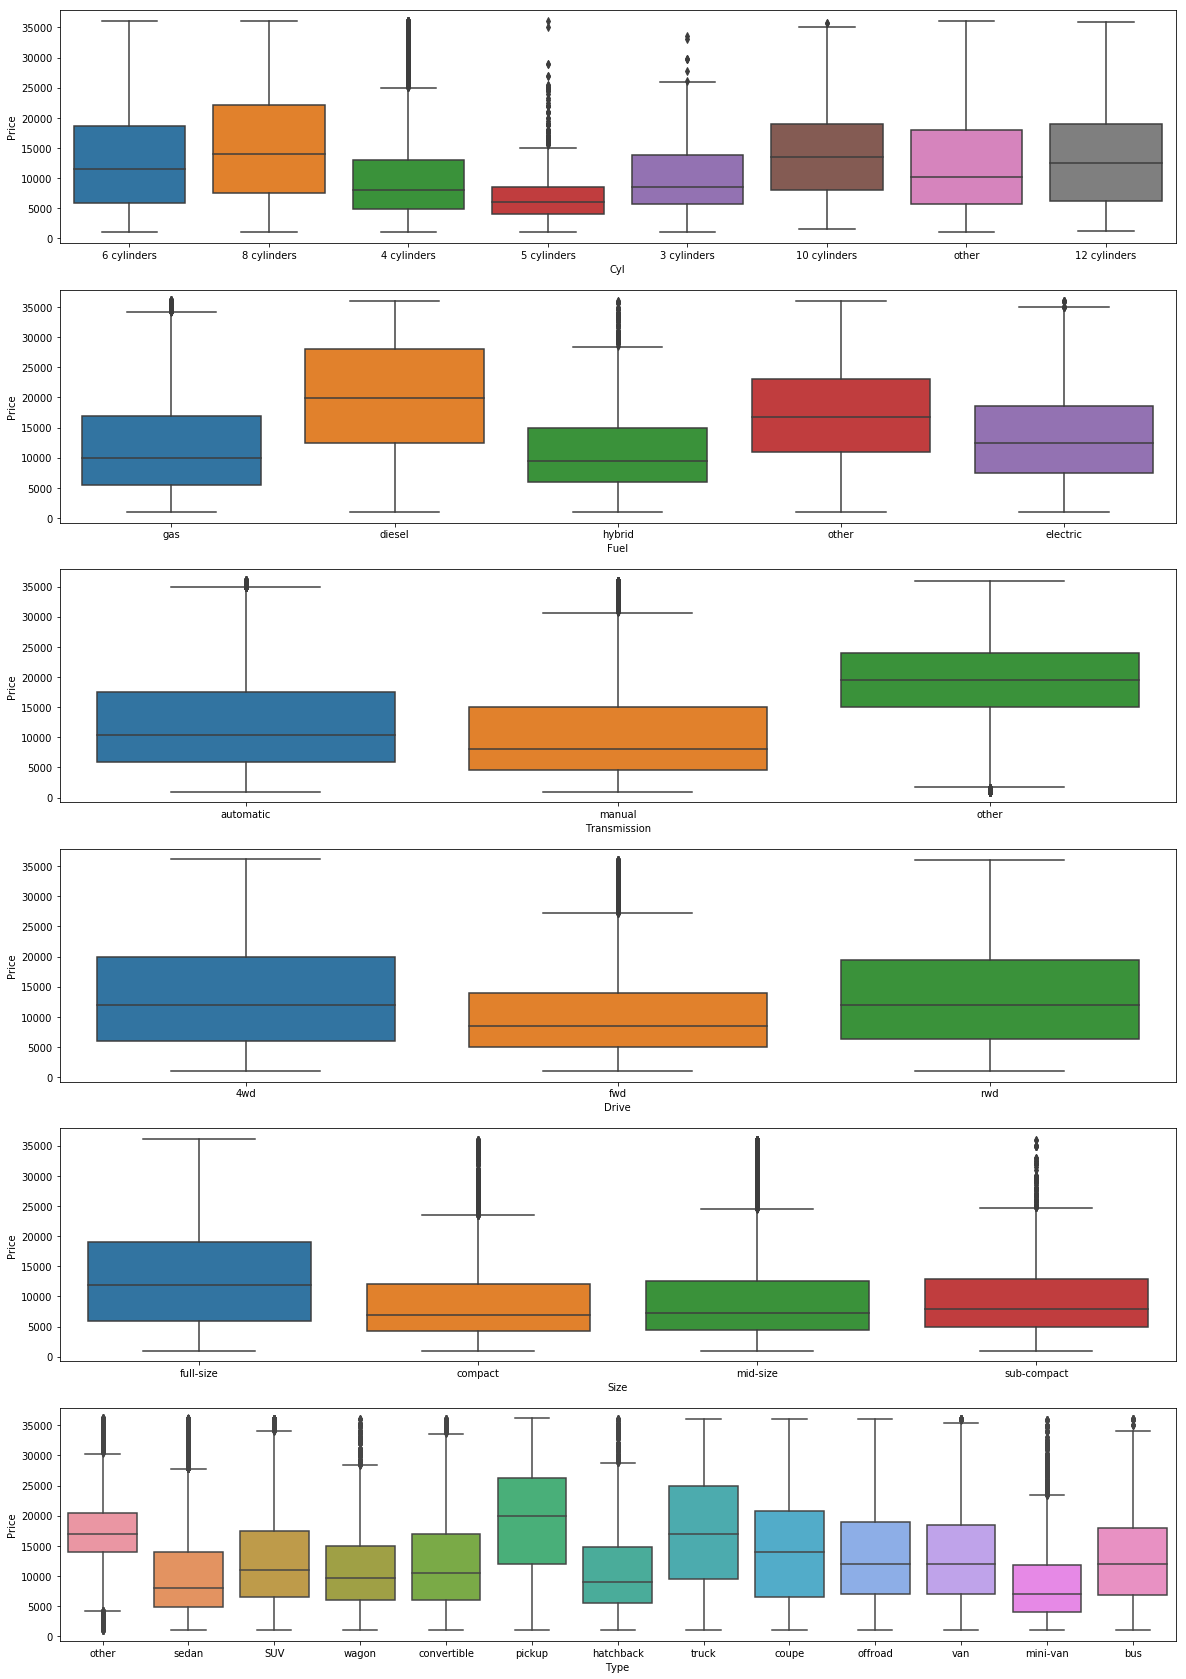

In [42]:
f=plt.figure(figsize=(20,30))
j=1
for i in cars_true[car_mechanic_features]:
    f.add_subplot(6,1,j)
    chart = sns.boxplot(cars_true[i],cars_true['Price'])
    j+=1   
plt.show()

### **`Insight`**
1. For Cylinder, we can assume that more number of cylinders, the higher median price they have. But we can find that 5 cylinders has the lowest cylinders because I believe most of vehicles are having 4 cylinders.

- For Fuel type, intuitively we believe that gas and electric cars will have higher median price. However, from the dataset, we see that diesel cars has the higher median price, it may relate to the number of listing on Craigslist compare to other type of cars. 

- Pickup has the third place in term of the number of listings but it does have the highest median price among all car types. And mini -van has the lowest median price. I believe that because SUV can be a substitute of mini-van.


In [43]:
cars_true['Type_size'] =cars_true[['Type', 'Size']].agg('-'.join, axis=1)

C:\Users\hokam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


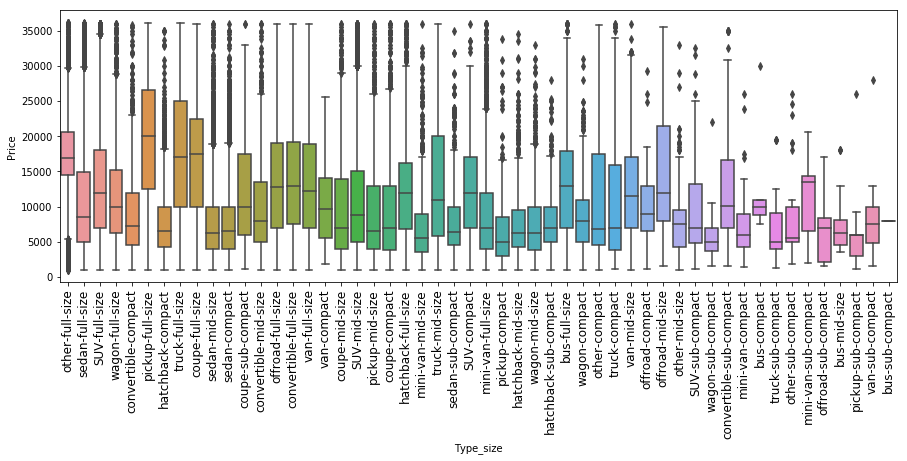

In [44]:
plt.figure(figsize=(15,5))
sns.boxplot(cars_true['Type_size'],cars_true['Price'])
plt.xticks(fontsize=12, rotation=90);

#### - Car Status (Condition, Title Status) and Appearance (Body Color) 

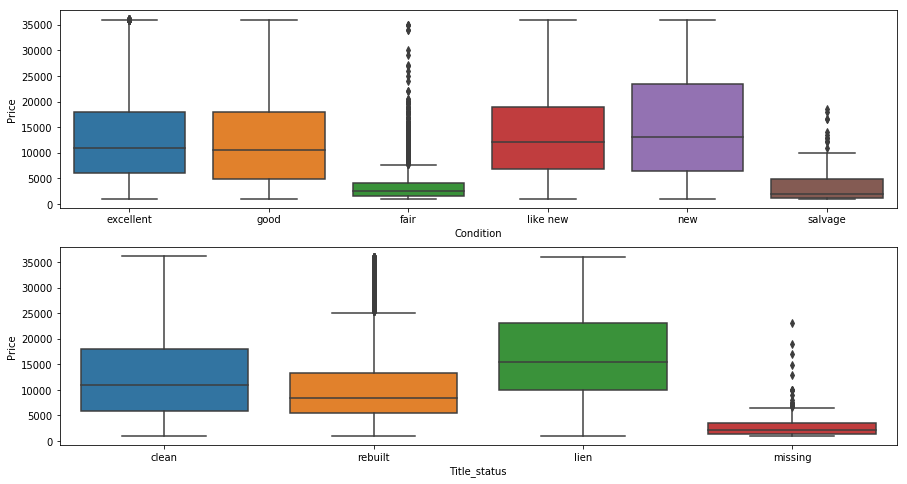

In [93]:
cars_status = ['Condition', 'Title_status']
f=plt.figure(figsize=(15,8))
j=1
for i in cars_true[cars_status]:
    f.add_subplot(2,1,j)
    chart = sns.boxplot(cars_true[i],cars_true['Price'])
    j+=1   
plt.show()

### **`Insight`**

`Condition, Title Status`

1. The graph above displays the frequency distributions for vehicles in the dataset of a certain condition. For persons more concerned about the condition of their vehicles,they will be more likely to consider a better condition one, that is why used cars in new or excellent condition with clean or lien title status would have higher resell power. 
 
- The graph above shows the mean price for each condition. New vehicles have an average sales price around 14,000, followed by vehicles which are like new. From clients standpoint, if they are looking for cheaper alternatives should look at vehicles with excellent to good condition, as they will on average have to spend couple thousand less on a vehicle. Vehicles with a fair condition are most likely severely depreciated, the price is greatly lower than good condition one by 8,000. So we don't suggest to buy back any car with fair to salvage condition.

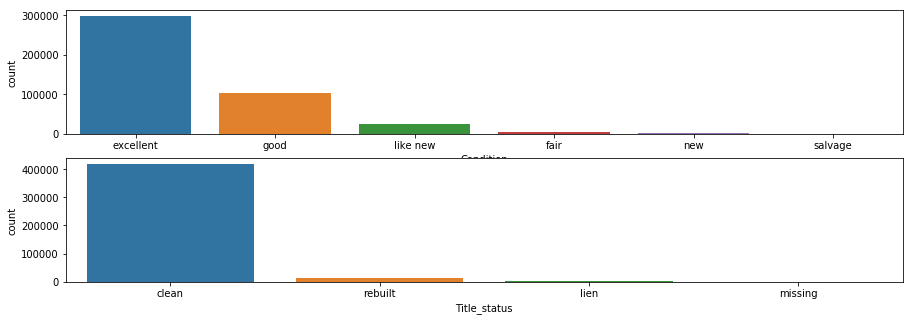

In [46]:
f=plt.figure(figsize=(15,5))
j=1
for i in cars_true[cars_status]:
    f.add_subplot(2,1,j)
    sns.countplot(cars_true[i],order=cars_true[i].value_counts().index)
    j+=1
plt.show()

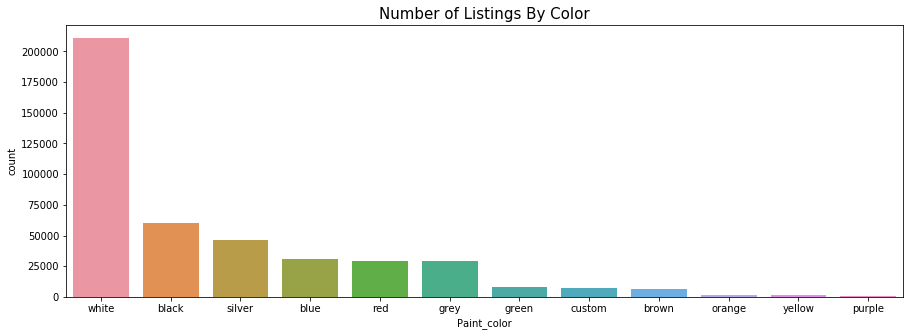

In [47]:
plt.figure(figsize=(15,5))
sns.countplot(cars_true['Paint_color'],order=cars_true['Paint_color'].value_counts().index)
plt.title('Number of Listings By Color', fontsize=15)
plt.show()

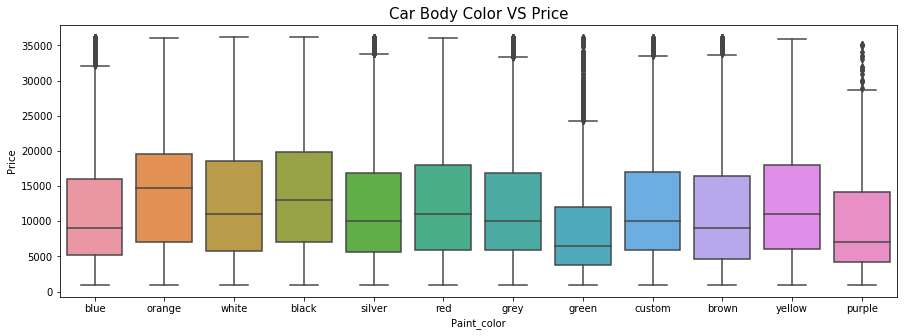

In [48]:
plt.figure(figsize=(15,5))
sns.boxplot(cars_true['Paint_color'],cars_true['Price'])
plt.title('Car Body Color VS Price', fontsize=15)
plt.show()

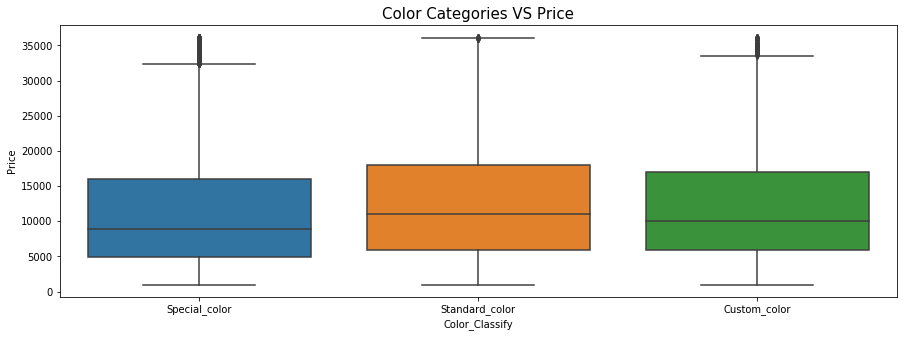

In [49]:
plt.figure(figsize=(15,5))
sns.boxplot(cars_true['Color_Classify'],cars_true['Price'])
plt.title('Color Categories VS Price', fontsize=15)
plt.show()

### **`Insight`**

`Color`

I classified orange as the Special Color and it turns out that it has the highest median price among all other color.


#### - Location

Here we are looking at the top 10 distribution of cars for sale by state. States such as California, with a population of pproximately 34 million, will generally have more vehicles available for purchase than other states. California has the highest number of vehicles for purchase with less than 160,000 vehicles for sale. States such as Washington will generally have less vehicles available for sale, with a population count of approximately 7 million. Washington has less than 60,000 vehicles available for purchase.

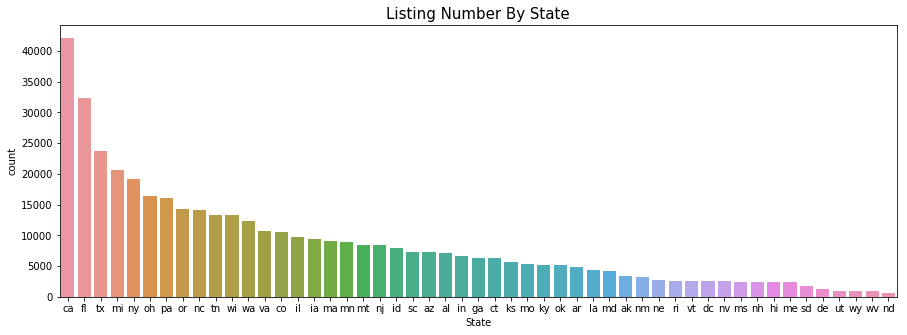

In [50]:
plt.figure(figsize=(15,5))
sns.countplot(cars_true['State'],order=cars_true['State'].value_counts().index)
plt.title('Listing Number By State', fontsize=15)
plt.show()


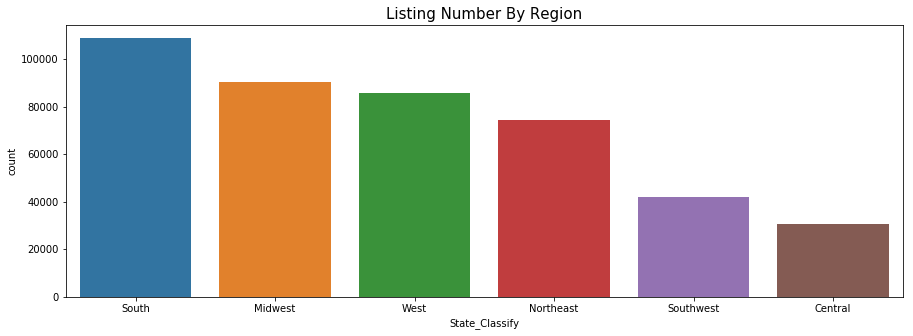

In [51]:
plt.figure(figsize=(15,5))
sns.countplot(cars_true['State_Classify'],order=cars_true['State_Classify'].value_counts().index)
plt.title('Listing Number By Region', fontsize=15)
plt.show()

### **`Insight`**

1. The states have more population will have more used car to purchase. For example, California, with a population of pproximately 34 million, will generally have more vehicles available for purchase than other states. 
- Region near coast also have more number of listings compare to the Central region.

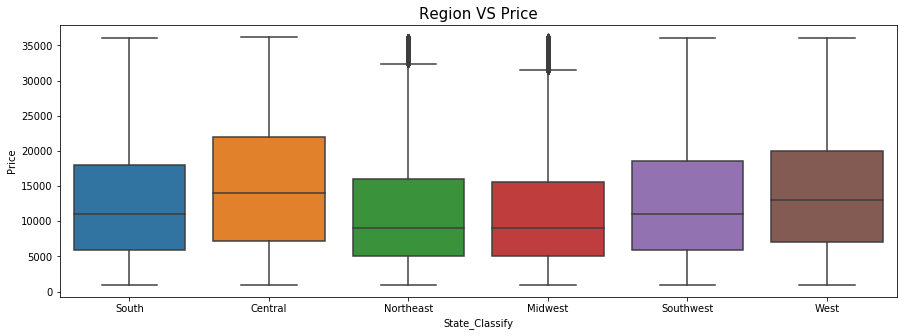

In [52]:
plt.figure(figsize=(15,5))
sns.boxplot(cars_true['State_Classify'],cars_true['Price'])
plt.title('Region VS Price', fontsize=15)
plt.show()

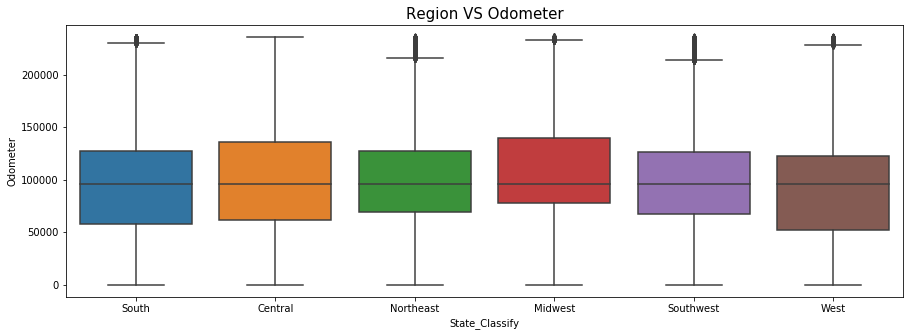

In [53]:
plt.figure(figsize=(15,5))
sns.boxplot(cars_true['State_Classify'],cars_true['Odometer'])
plt.title('Region VS Odometer', fontsize=15)
plt.show()

### **`Insight`**

The median listing price are quiet different although they have similar average mileage. Central region has the highest median listing price among all other regions. 

#### - Car Make VS Price

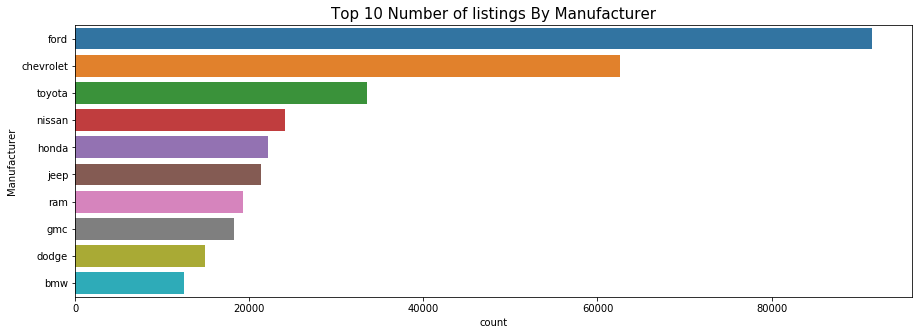

In [54]:
plt.figure(figsize=(15,5))
sns.countplot(y=cars_true['Manufacturer'],order=cars_true['Manufacturer'].value_counts().head(10).index)
plt.title('Top 10 Number of listings By Manufacturer', fontsize=15)
plt.show()

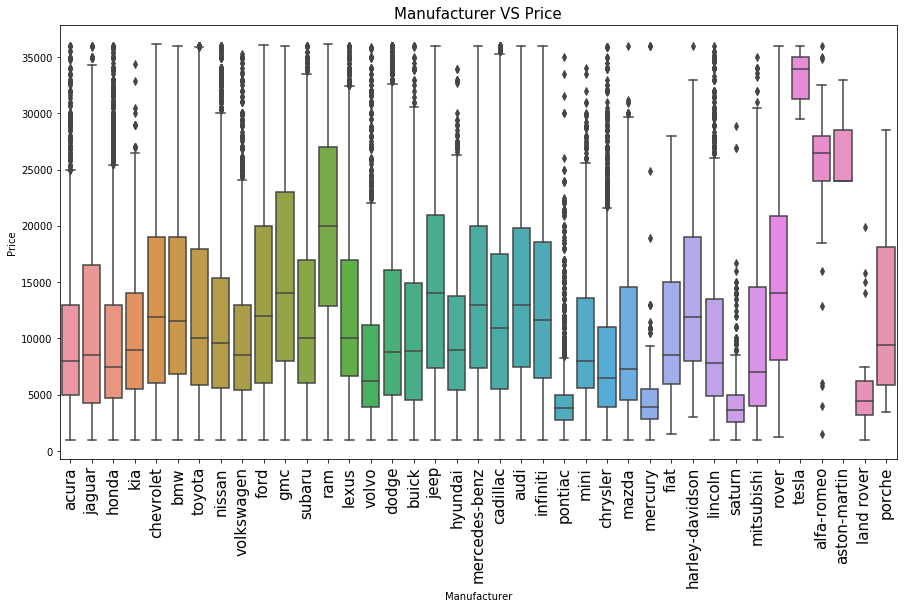

In [55]:
plt.figure(figsize=(15,8))
sns.boxplot(cars_true['Manufacturer'],cars_true['Price'])
plt.xticks(fontsize=15, rotation=90)
plt.title('Manufacturer VS Price', fontsize=15)
plt.show()

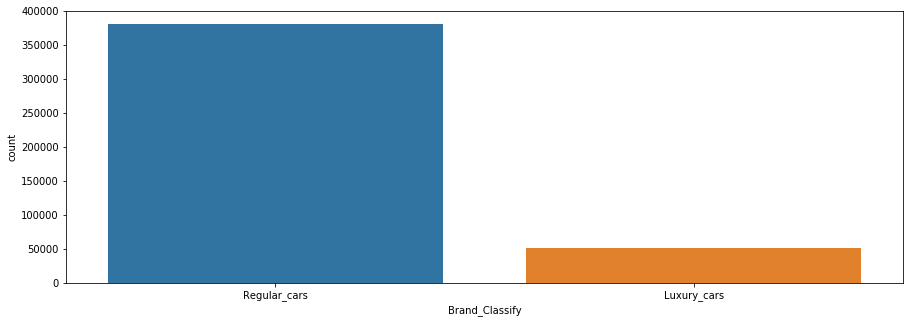

In [56]:
plt.figure(figsize=(15,5))
sns.countplot(cars_true['Brand_Classify'],order=cars_true['Brand_Classify'].value_counts().index)

### **`Insight`**

1. American brand cars have the most number of listings then foreign makes espeically Japanese brand.
- We also can see that luxury cars such as Tesla have higher median price

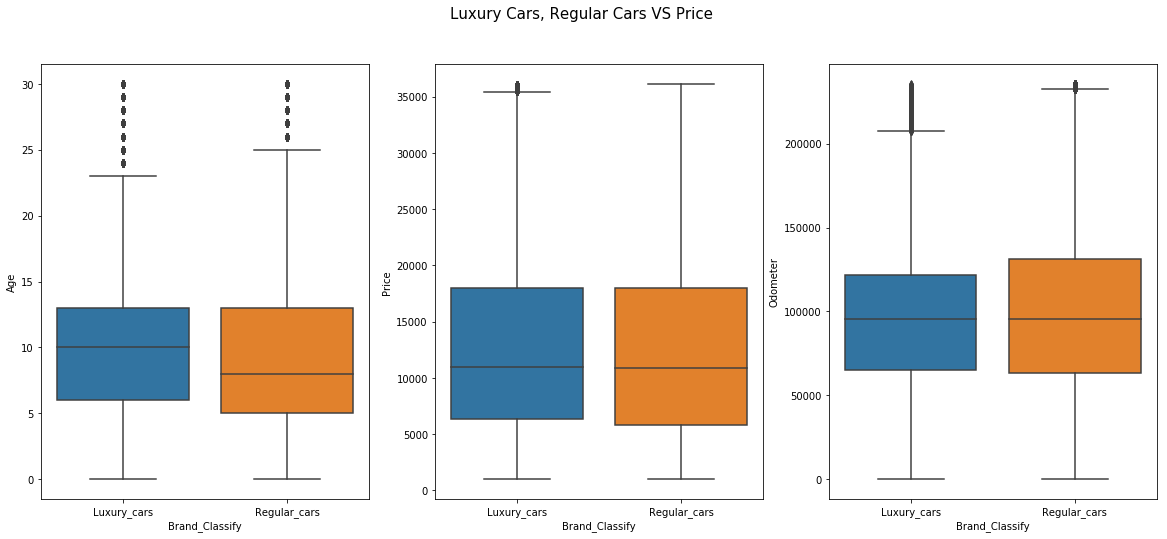

In [57]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.boxplot(x='Brand_Classify', y="Age",data=cars_true)

plt.subplot(1,3,2)
sns.boxplot(x='Brand_Classify', y="Price",data=cars_true)

plt.subplot(1,3,3)
sns.boxplot(x='Brand_Classify', y="Odometer",data=cars_true)

plt.suptitle("Luxury Cars, Regular Cars VS Price", fontsize = 15);

### **`Insight`**

From above three charts, it indicates that luxuxry cars maintain greater value even though they are older but having same mileage compare to regular cars. 

## Get Dummy Variables

#### From different charts we plots, we do believe all of them are having strong relationship with Price, thus, I will dummy all categorical features. I will use State_Classify, Brand_Classify and Color_classify substitude of State, Manufacturing and Color.

In [58]:
dummy_features = ['Condition','Cyl','Fuel',
                  'Title_status','Transmission', 'Drive',
                  'Size','Type','State_Classify','Brand_Classify','Color_Classify' ]

In [59]:
dummies=pd.get_dummies(cars_true[dummy_features],drop_first=True)

In [60]:
df_corr = dummies.copy()
df_corr['Age'] = cars_true['Age'].values
df_corr['Odometer'] = cars_true['Odometer'].values
df_corr['Price'] = cars_true['Price'].values



In [61]:
corr = df_corr.corr()
corr.drop('Price', inplace=True)


In [62]:
corr['Price'].sort_values(ascending=False).head(10)

Type_pickup                      0.254066
Transmission_other               0.176168
Size_full-size                   0.174535
Type_truck                       0.162547
Cyl_8 cylinders                  0.141105
State_Classify_West              0.104368
Fuel_other                       0.091466
Type_other                       0.090365
Color_Classify_Standard_color    0.066724
Cyl_6 cylinders                  0.049589
Name: Price, dtype: float64

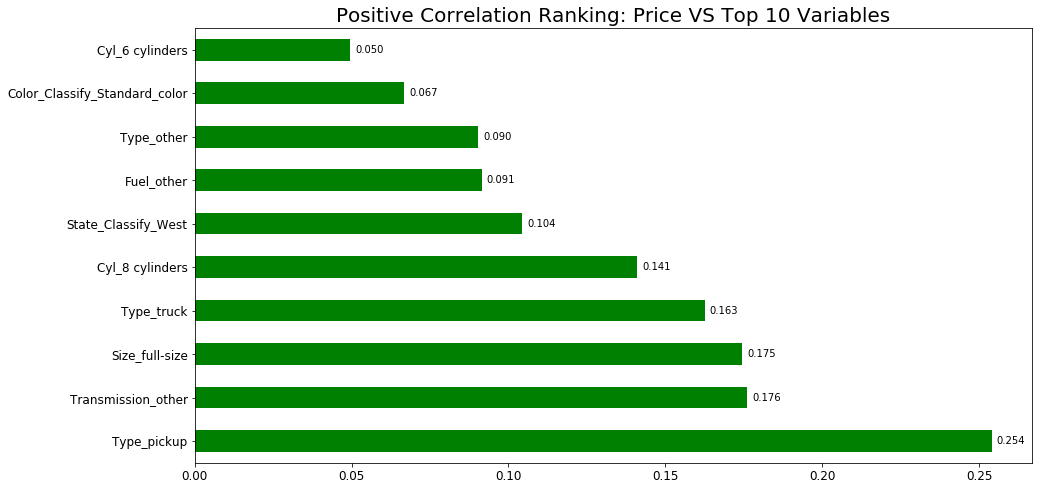

In [63]:
plt.figure(figsize=(15,8))
ax= corr['Price'].sort_values(ascending=False).head(10).plot(kind='barh', color="g", fontsize=12)
plt.grid(False)
plt.title('Positive Correlation Ranking: Price VS Top 10 Variables', fontsize=20)

# thanks to https://stackoverflow.com/questions/59213470/how-to-annotate-text-on-horizontal-seaborn-barplot
for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")
    


In [64]:
corr['Price'].sort_values(ascending=False).tail(10)

State_Classify_Northeast   -0.072971
State_Classify_Midwest     -0.092195
Condition_fair             -0.123979
Size_mid-size              -0.127864
Cyl_4 cylinders            -0.188057
Drive_fwd                  -0.212298
Fuel_gas                   -0.232097
Type_sedan                 -0.259735
Odometer                   -0.477018
Age                        -0.596854
Name: Price, dtype: float64

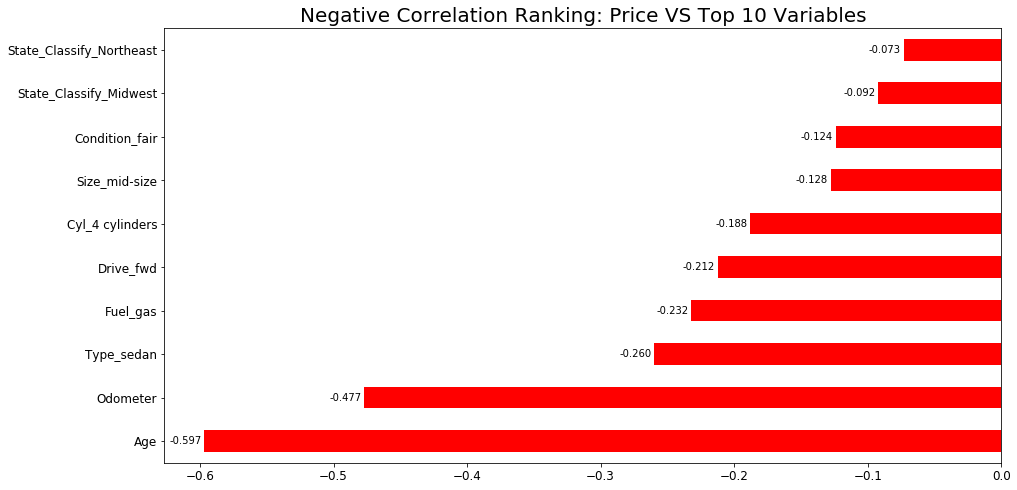

In [65]:
plt.figure(figsize=(15,8))
ax1 = corr['Price'].sort_values().head(10).plot(kind='barh', color="r", fontsize=12)
plt.grid(False)
plt.title('Negative Correlation Ranking: Price VS Top 10 Variables', fontsize=20)

for p in ax1.patches:
    ax1.annotate("%.3f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(-35, 0), textcoords='offset points', ha="left", va="center")

### **`Insight`**

If Vehicle type is Pick up or Truck, it will have positive relationship with the Price. Full size of Vehicle and higher number of cylinders will likely have greater positive impact on the price as well. 

Normally, we will think that Fuel type as Gas will have neutral impact on the price since it is pretty commonly type for most of the vehicles, however, the result shows that it actually has a negative relationship. The reason may relate to the rise of enviromental friendly cars in the market such as Hybrid and Electric cars as well as the rising price of gas. 

Front wheel drive's impact on the price is negative since it consumes more gas compare to other driving types.


# Trying to consolidate the categorical feature further

In [66]:
cars_true_2 = cars_true.copy()

cars_true_2['is_clean_title'] =cars_true_2['Title_status'].apply(lambda x : 1 if x == 'clean' else 0)
cars_true_2['is_gas'] =cars_true_2['Fuel'].apply(lambda x : 1 if x == 'gas' else 0)
cars_true_2['is_4wd'] =cars_true_2['Drive'].apply(lambda x : 1 if x == '4wd' else 0)
cars_true_2['is_automatic'] =cars_true_2['Transmission'].apply(lambda x : 1 if x == 'automatic' else 0)
cars_true_2['is_sedan'] =cars_true_2['Type'].apply(lambda x : 1 if x == 'sedan' else 0)

In [67]:
dummies2=pd.get_dummies(cars_true_2[['Condition','Cyl','Size','State_Classify','Brand_Classify',
       'Color_Classify']],drop_first=True)

In [68]:
df_corr2 = dummies2.copy()
df_corr2['Age'] = cars_true_2['Age'].values
df_corr2['Odometer'] = cars_true_2['Odometer'].values
df_corr2['Price'] = cars_true_2['Price'].values
df_corr2['is_clean_title'] = cars_true_2['is_clean_title'].values
df_corr2['is_gas'] = cars_true_2['is_gas'].values
df_corr2['is_4wd'] = cars_true_2['is_4wd'].values
df_corr2['is_automatic']= cars_true_2['is_automatic'].values
df_corr2['is_sedan']= cars_true_2['is_sedan'].values

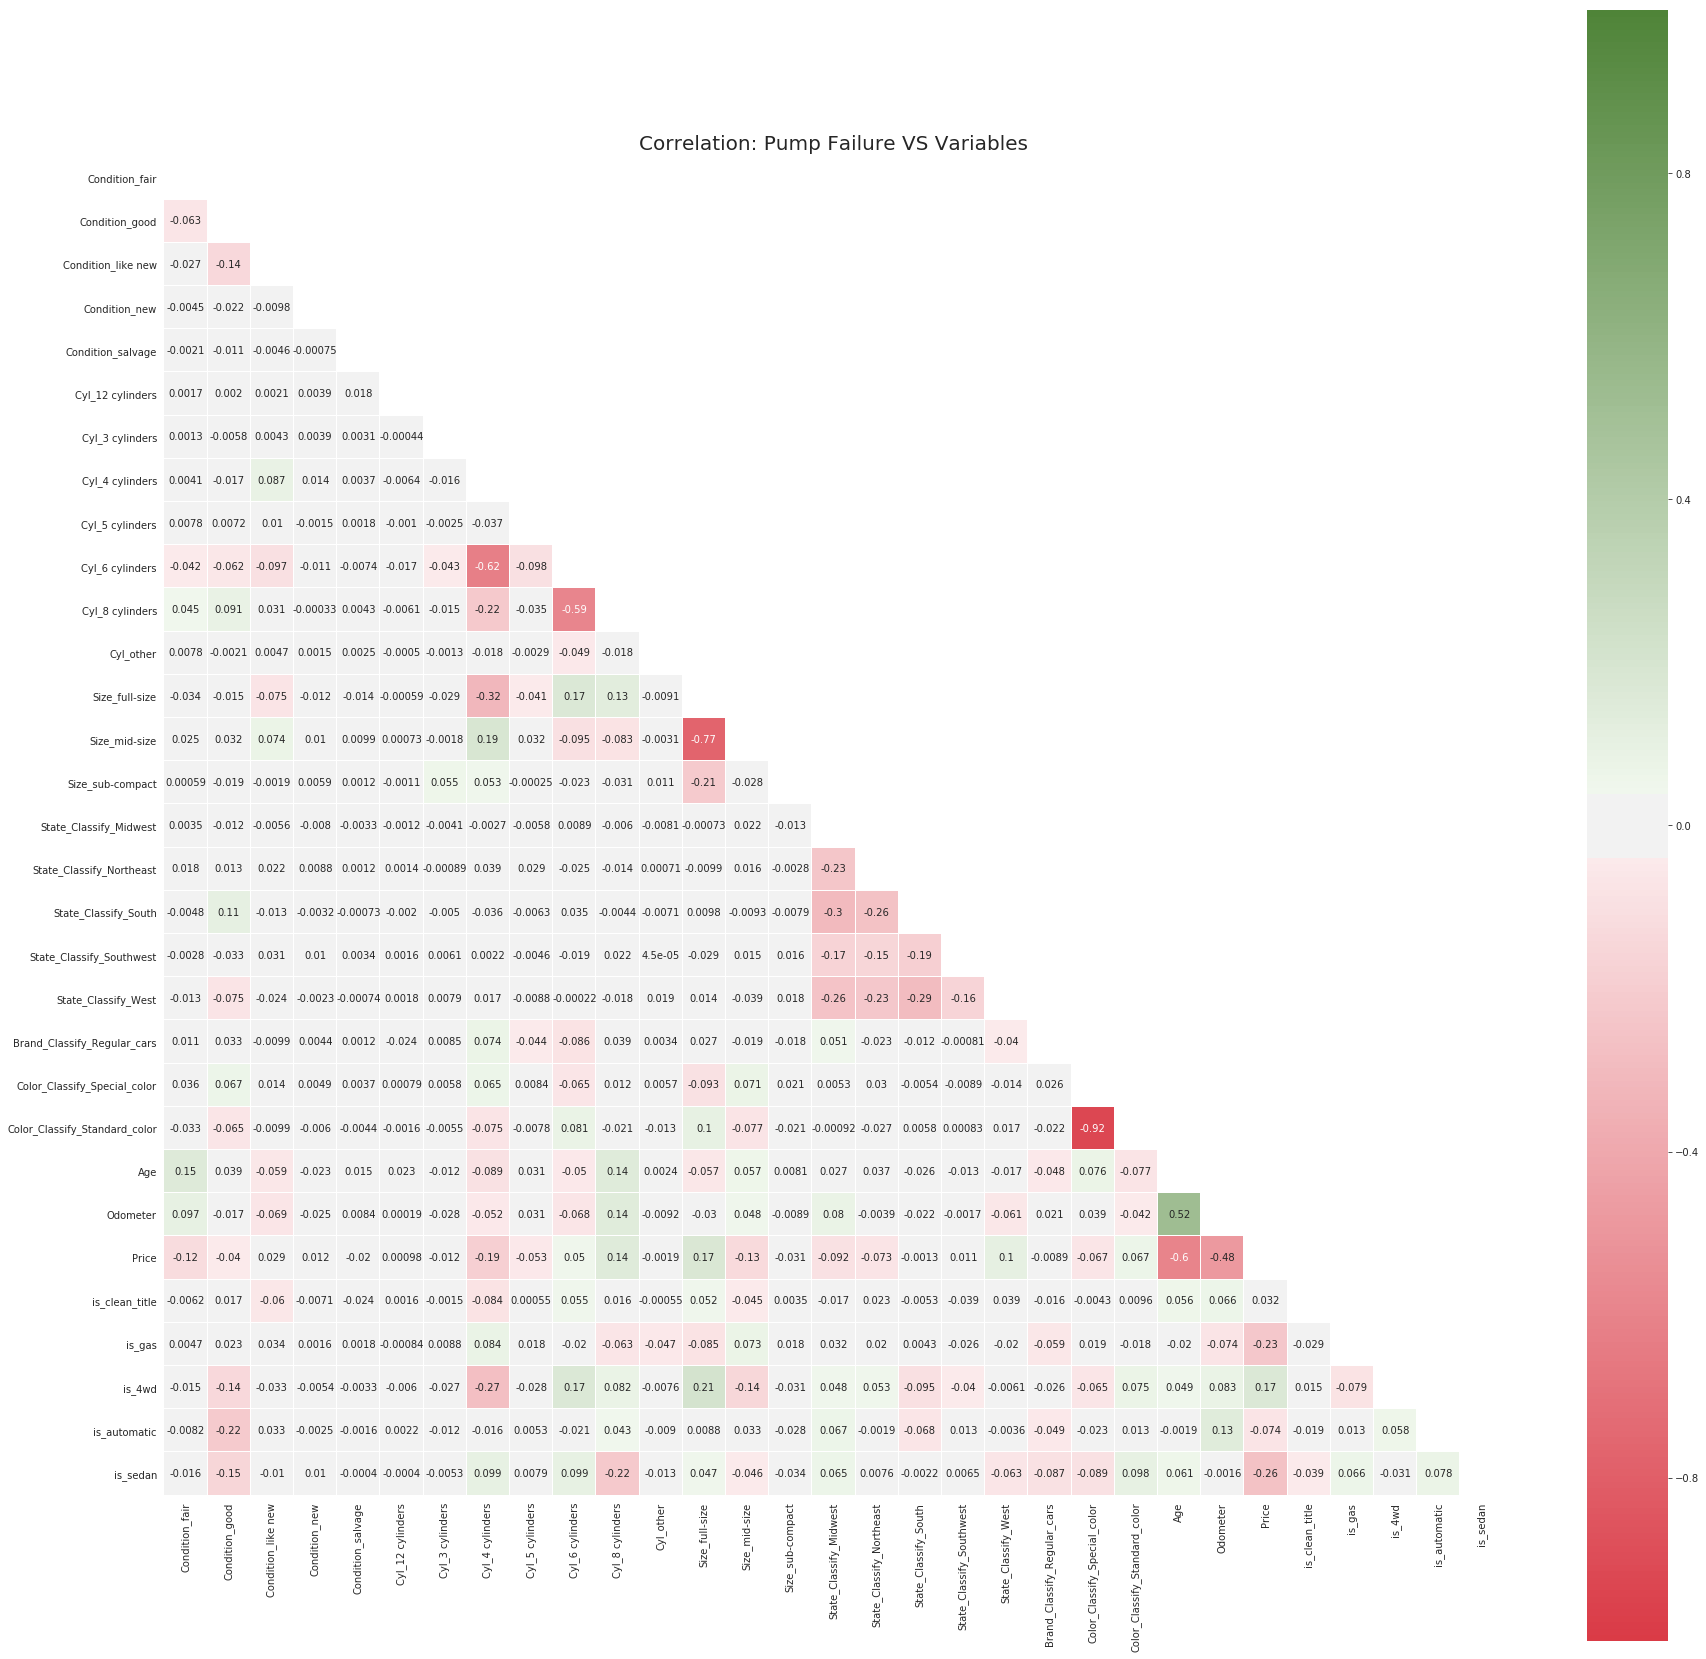

In [69]:
plt.figure(figsize = (30,30))

corr2 = df_corr2.corr()

# set up mask to be 'True' in the upper triangle
mask = np.zeros_like(corr2)
mask[np.triu_indices_from(mask)] = True

#Plot our correlation heatmap, while masking the upper triangle to be white
with sns.axes_style('white'):
    sns.heatmap(corr2,mask=mask, cmap=sns.diverging_palette(10, 120, as_cmap=True),
                linewidths=.1,vmin=-1,vmax=1, square=True, annot=True)

plt.title('Correlation: Pump Failure VS Variables', fontsize=20);

In [70]:
corr2['Price'].sort_values(ascending=False).head(11)

Price                            1.000000
Size_full-size                   0.174535
is_4wd                           0.168410
Cyl_8 cylinders                  0.141105
State_Classify_West              0.104368
Color_Classify_Standard_color    0.066724
Cyl_6 cylinders                  0.049589
is_clean_title                   0.032005
Condition_like new               0.028978
Condition_new                    0.012487
State_Classify_Southwest         0.010850
Name: Price, dtype: float64

In [71]:
corr2['Price'].sort_values(ascending=False).tail(10)

State_Classify_Northeast   -0.072971
is_automatic               -0.074055
State_Classify_Midwest     -0.092195
Condition_fair             -0.123979
Size_mid-size              -0.127864
Cyl_4 cylinders            -0.188057
is_gas                     -0.232097
is_sedan                   -0.259735
Odometer                   -0.477018
Age                        -0.596854
Name: Price, dtype: float64

# Create Prediction Model by OLS

## First OLS: Hotcoding all Categorical Feature (1 or 0)

In [72]:
numerical_feature.pop(0)

'ID'

In [73]:
numerical_feature.append('Age')

In [74]:
numerical_feature.pop(1)

'Year'

In [75]:
print(numerical_feature)
cars_true_dummies=pd.concat([cars_true,dummies],axis=1)

['Price', 'Odometer', 'Age']


In [76]:
cars_true[['Price', 'Age','Odometer','Year']].corr()

,Price,Age,Odometer,Year
Price,1.000000,-0.596854,-0.477018,0.596854
Age,-0.596854,1.000000,0.516403,-1.000000
Odometer,-0.477018,0.516403,1.000000,-0.516403
Year,0.596854,-1.000000,-0.516403,1.000000


#### Age and Odometer are highly correlated to each other, So I will pick Odometer to make my prediction feature. 

In [101]:
filt1 = ['Odometer']
feature = filt1 + dummies.columns.tolist()
y=cars_true_dummies['Price']
dependent_features = cars_true_dummies[feature] 

model=sm.OLS(y,dependent_features).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                 4.684e+04
Date:                Sat, 18 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:50:51   Log-Likelihood:            -4.3837e+06
No. Observations:              432035   AIC:                         8.768e+06
Df Residuals:                  431988   BIC:                         8.768e+06
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Odometer      

In [102]:
p=model.pvalues<0.05

print("{:2.2f} percent of variables are statistically significant".format(sum(p)*100/len(p)))
print("-------------------------------------------------------------\n")
      
print("List of statistically significant variables at 95% confidence level: {} ".format(p[p].index.tolist()),flush=True)


97.87 percent of variables are statistically significant
-------------------------------------------------------------

List of statistically significant variables at 95% confidence level: ['Odometer', 'Condition_fair', 'Condition_good', 'Condition_like new', 'Condition_new', 'Condition_salvage', 'Cyl_12 cylinders', 'Cyl_3 cylinders', 'Cyl_4 cylinders', 'Cyl_5 cylinders', 'Cyl_6 cylinders', 'Cyl_8 cylinders', 'Cyl_other', 'Fuel_electric', 'Fuel_gas', 'Fuel_hybrid', 'Fuel_other', 'Title_status_lien', 'Title_status_missing', 'Title_status_rebuilt', 'Transmission_manual', 'Transmission_other', 'Drive_fwd', 'Drive_rwd', 'Size_full-size', 'Size_mid-size', 'Size_sub-compact', 'Type_bus', 'Type_convertible', 'Type_coupe', 'Type_hatchback', 'Type_mini-van', 'Type_offroad', 'Type_other', 'Type_pickup', 'Type_sedan', 'Type_truck', 'Type_van', 'Type_wagon', 'State_Classify_Midwest', 'State_Classify_Northeast', 'State_Classify_South', 'State_Classify_Southwest', 'Brand_Classify_Regular_cars', 'Col

In [79]:
cars_price_pred = model.predict(dependent_features)

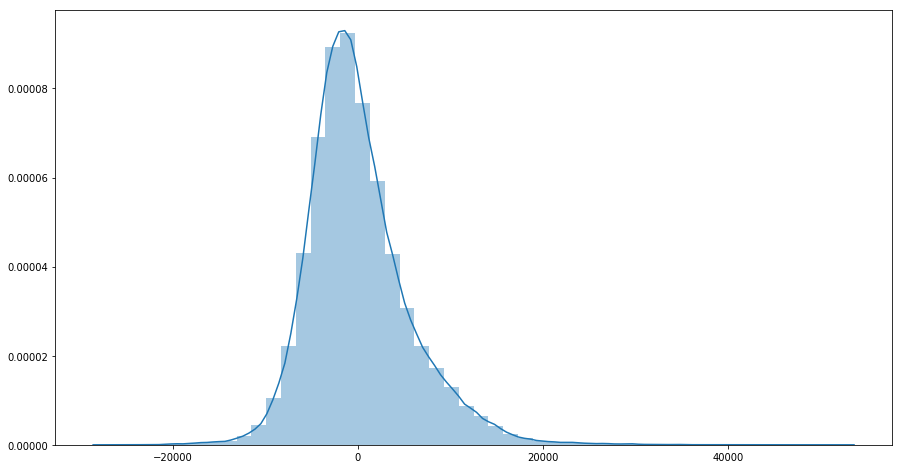

In [94]:
plt.figure(figsize=(15,8))
residuals = cars_true['Price'] - cars_price_pred

sns.distplot(residuals)

## Second OLS :Consolidated Categorical feature to run OLS again to check the R Square

In [81]:
feature2 = ['Condition_fair', 'Condition_good', 'Condition_like new',
       'Condition_new', 'Condition_salvage', 'Cyl_12 cylinders',
       'Cyl_3 cylinders', 'Cyl_4 cylinders', 'Cyl_5 cylinders',
       'Cyl_6 cylinders', 'Cyl_8 cylinders', 'Cyl_other', 'Size_full-size',
       'Size_mid-size', 'Size_sub-compact', 'State_Classify_Midwest',
       'State_Classify_Northeast', 'State_Classify_South',
       'State_Classify_Southwest', 'State_Classify_West',
       'Brand_Classify_Regular_cars', 'Color_Classify_Special_color',
       'Color_Classify_Standard_color', 'Odometer', 
       'is_clean_title', 'is_gas', 'is_4wd', 'is_automatic', 'is_sedan']

y2=df_corr2['Price']
dependent_features2 = df_corr2[feature2] 

model2=sm.OLS(y2,dependent_features2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                 7.059e+04
Date:                Sat, 18 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:21:54   Log-Likelihood:            -4.3967e+06
No. Observations:              432035   AIC:                         8.794e+06
Df Residuals:                  432006   BIC:                         8.794e+06
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Condition_fair

In [82]:
p2=model.pvalues<0.05

print("{:2.2f} percent of variables are statistically significant".format(sum(p2)*100/len(p2)))
print("-------------------------------------------------------------\n")
      
print("List of statistically significant variables at 95% confidence level: {} ".format(p[p].index.tolist()),flush=True)


97.87 percent of variables are statistically significant
-------------------------------------------------------------

List of statistically significant variables at 95% confidence level: ['Age', 'Condition_fair', 'Condition_good', 'Condition_like new', 'Condition_new', 'Condition_salvage', 'Cyl_12 cylinders', 'Cyl_3 cylinders', 'Cyl_4 cylinders', 'Cyl_5 cylinders', 'Cyl_6 cylinders', 'Cyl_8 cylinders', 'Cyl_other', 'Fuel_electric', 'Fuel_gas', 'Fuel_hybrid', 'Fuel_other', 'Title_status_lien', 'Title_status_missing', 'Title_status_rebuilt', 'Transmission_manual', 'Transmission_other', 'Drive_fwd', 'Size_full-size', 'Size_mid-size', 'Size_sub-compact', 'Type_bus', 'Type_convertible', 'Type_coupe', 'Type_hatchback', 'Type_mini-van', 'Type_offroad', 'Type_other', 'Type_pickup', 'Type_sedan', 'Type_truck', 'Type_van', 'Type_wagon', 'State_Classify_Midwest', 'State_Classify_Northeast', 'State_Classify_South', 'State_Classify_Southwest', 'State_Classify_West', 'Brand_Classify_Regular_cars',

In [83]:
cars_price_pred2 = model2.predict(dependent_features2)

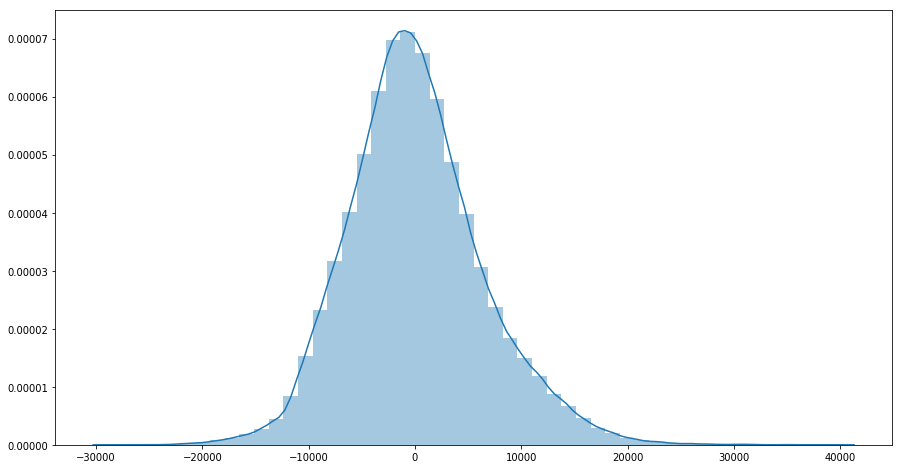

In [96]:
plt.figure(figsize=(15,8))
residuals_2 = cars_true['Price'] - cars_price_pred2

sns.distplot(residuals_2);

### Trying encoder method to encode Categorial Feature then use Sklearn LR to create Predition model

In [85]:
#https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [86]:
cars_true_1 = cars_true.copy()

labels = ['Manufacturer', 'Condition', 'Cyl', 'Fuel', 'Title_status', 'Transmission', 
          'Drive', 'Size', 'Type', 'Paint_color']

les = {}

for l in labels:
    les[l] = LabelEncoder()
    les[l].fit(cars_true_1[l])
    tr = les[l].transform(cars_true_1[l]) 
    cars_true_1.loc[:, l + '_feat'] = pd.Series(tr, index=cars_true_1.index)

labeled = cars_true_1[ ['Price','Odometer','Age']+ [x+"_feat" for x in labels]]

In [88]:
labeled.head()

,Price,Odometer,Age,Manufacturer_feat,Condition_feat,Cyl_feat,Fuel_feat,Title_status_feat,Transmission_feat,Drive_feat,Size_feat,Type_feat,Paint_color_feat
0,10299,90186,8,0,0,5,2,0,0,0,1,7,1
1,9500,85000,9,17,0,5,2,0,0,0,1,9,1
2,3995,212526,16,14,0,5,2,0,0,1,1,0,6
3,12995,85127,5,19,0,5,2,0,0,0,1,12,10
4,10995,112383,6,7,0,5,2,0,0,1,1,0,0


In [89]:
categorical_feature3 =['Manufacturer_feat', 'Condition_feat',
       'Cyl_feat', 'Fuel_feat', 'Title_status_feat', 'Transmission_feat',
       'Drive_feat', 'Size_feat', 'Type_feat', 'Paint_color_feat']

y3=labeled['Price']
dependent_features3 = labeled[categorical_feature3]

model3= LinearRegression()

model3.fit(dependent_features3,y3)

cars_price_pred3 = model3.predict(dependent_features3)

In [90]:
def cars_MLR_metrics(y_true, y_pred):
    mse = metrics.mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = metrics.median_absolute_error(y_true, y_pred)
    r2= metrics.r2_score(y_true, y_pred)
    
    print('Mean squared error      = ', mse)
    print('Root mean squared error = ', rmse)
    print('Median absolute error   = ', mae)
    print('R^2                     = ', r2)

In [91]:
cars_MLR_metrics(y3,cars_price_pred3)

Mean squared error      =  64301269.35296744
Root mean squared error =  8018.807227572405
Median absolute error   =  5915.231971744313
R^2                     =  0.08764538655469023


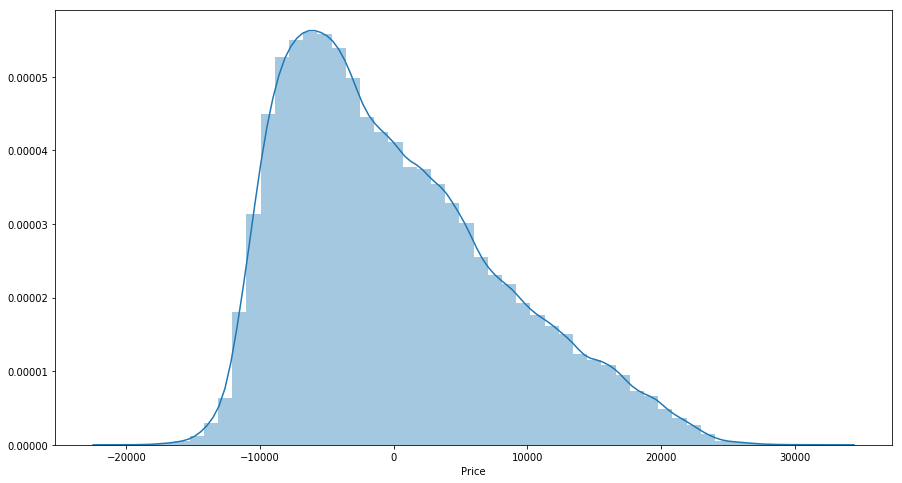

In [97]:
plt.figure(figsize=(15,8))
residuals_3 = cars_true['Price'] - cars_price_pred3

sns.distplot(residuals_3);

In [98]:
cars_true.columns

Index(['ID', 'Price', 'Year', 'Manufacturer', 'Condition', 'Cyl', 'Fuel',
       'Odometer', 'Title_status', 'Transmission', 'Drive', 'Size', 'Type',
       'Paint_color', 'State', 'Age', 'State_Classify', 'Brand_Classify',
       'Color_Classify', 'Type_size'],
      dtype='object')

In [ ]:
#List of statistically significant variables at 95% confidence level: 
['Odometer', 'Condition_fair', 'Condition_good', 'Condition_like new', 'Condition_new', 
 'Condition_salvage', 'Cyl_12 cylinders', 'Cyl_3 cylinders', 'Cyl_4 cylinders', 'Cyl_5 cylinders', 
 'Cyl_6 cylinders', 'Cyl_8 cylinders', 'Cyl_other', 'Fuel_electric', 'Fuel_gas', 'Fuel_hybrid', 'Fuel_other',
 'Title_status_lien', 'Title_status_missing', 'Title_status_rebuilt', 'Transmission_manual', 'Transmission_other',
 'Drive_fwd', 'Drive_rwd', 'Size_full-size', 'Size_mid-size', 'Size_sub-compact', 'Type_bus', 'Type_convertible', 
 'Type_coupe', 'Type_hatchback', 'Type_mini-van', 'Type_offroad', 'Type_other', 'Type_pickup', 'Type_sedan', 
 'Type_truck', 'Type_van', 'Type_wagon', 'State_Classify_Midwest', 'State_Classify_Northeast', 'State_Classify_South',
 'State_Classify_Southwest', 'Brand_Classify_Regular_cars', 'Color_Classify_Special_color', 
 'Color_Classify_Standard_color'] 

# Conclusion: 

### From the Craiglist Used Car dataset, we narrow down our dataset by Vehicales' age, Odometer and Condition to fit our analysis goal. We found that 97% of variables are significant to our listing price. 

### The following are the top 5 variables that have `Positive` impact on our price:

1. Number of Cylinders
- Vehicle Size
- Vehicle Type
- Transmission Type
- New to Excellent condition

### The following are the top 5 variables that have `Negative` impact on our price:

1. Unclear Title Status
- Increasing Mileage
- Fuel
- Hatchback and Sedan depreciate the most
- Vehicles in midwest and northeast might depreciate the vehicles

### Since we want to increase our sales revenue by 10%, by figuring how to price our used cars in the market will be the most important step for us. We can do the following:
1. we can buy back the used cars from private parties from Northesat and Midwest regions since they both reasonable median listing price compare and resell them to other region such as Central.
- We should utilize tiered pricing on different type of cars depend on its horsepower, transmission type and their condition since these elements have direct impact on the pricing when we put our cars in the market. We should definitely avoid buy back any vehicles in fair condition.
- For the selection of vehicle, we need to analyse the customers' need in order to recommand the size of vehcile. We can provide additional research service to our customers to keep them updates what it is in the market (not limited to the local search)


